In [1]:
# project setup
using Pkg;Pkg.activate(localprojectdir())
ENV["JULIA_DEBUG"] = ""

""

In [6]:
using LinearAlgebra, Plots, FrameFunRBF, DomainSets, FrameFun, PGFPlotsX, CompactTranslatesDict, LaTeXStrings, Printf

# Periodize via sum

$\phi_{\epsilon}(x) = \sum_{k\in\mathbb Z}e^{-\epsilon^2 (x-k)^2}$

Plot some of the dictionaries consisting of translated periodic Gaussians

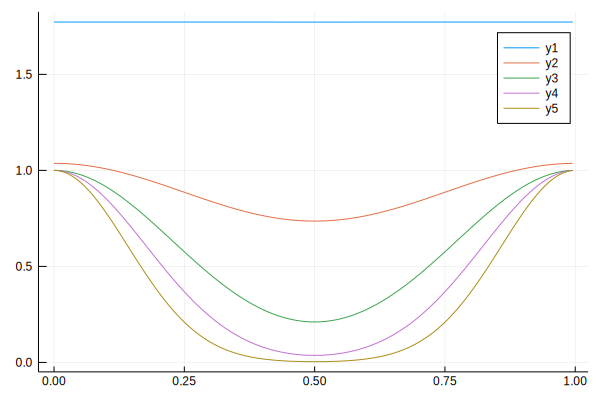

In [3]:
N = 51
plot();for eps in [1:5...]
    P = RBFPETPlatform(Gaussian((1.));domain=(0.0)..(1.0),select=RBFParConstant((eps)))
    plot!(dictionary(P,N)[1])
end;plot!()

Calculate the eigenvalues of the collocation matrix $A$ with $A_{i,j}=\phi_\epsilon(|i-j|/N)$

In [104]:
setprecision(10000)
D = Dict()
epss = 10.0.^LinRange(log10.([1,5])...,10)
for eps in epss
    P = RBFPETPlatform(Gaussian(big(1.));domain=big(0.0)..big(1.0),select=RBFParConstant(big(eps)))
    A = evaluation_operator(dictionary(P,N),sampling_grid(P,N))
    D[eps] = sort(real.(Circulant(A.A).vcvr_dft);rev=true)
end

Plot the singular values with respect to $\epsilon$. The eigenvalue pattern is 1,2,2,2,2,2,...

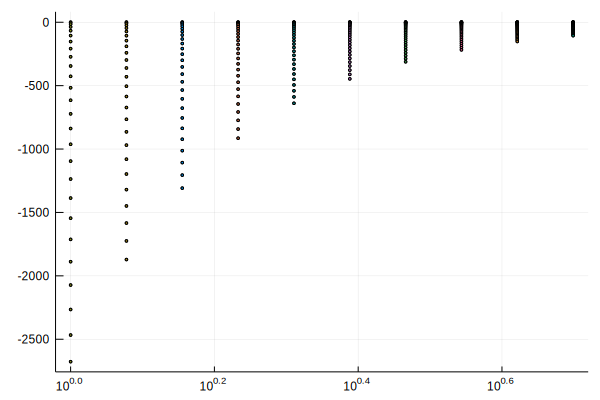

In [105]:
plot();for (eps,sing) in D 
    scatter!(eps*ones(size(sing)),log10.(sing);markersize=1)
end;plot!(;xscale=:log10,legend=false)

The first group is something like $(\epsilon^{-1})$

The growth is due to the increasing norm of the dictionary for decreasing $\epsilon$. 

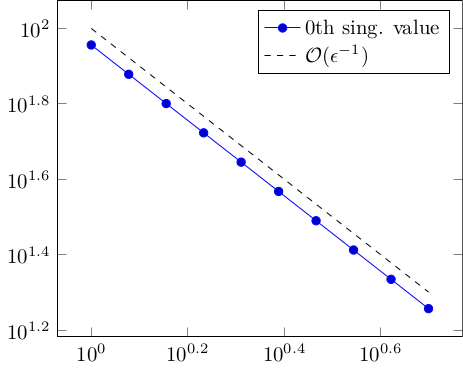

In [108]:
@pgf Axis({xmode="log",ymode="log",legend_pos="north east",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,1e2epss.^-1)),
    LegendEntry("0th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O(\\epsilon^{-1})\$"))
)

The follong groups go down very fast.

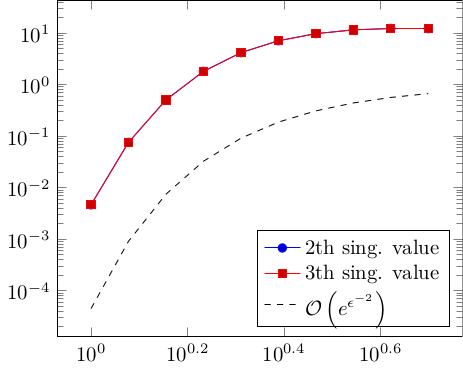

In [114]:
k = 1
@pgf Axis({xmode="log",ymode="log",legend_pos="south east",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,eps(BigFloat).+exp.(-10(big.(epss).^(-2))))),
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O\\left(e^{\\epsilon^{-2}}\\right)\$"))
)

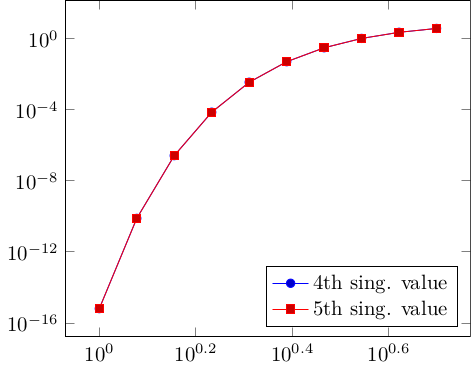

In [118]:
k = 2
@pgf Axis({xmode="log",ymode="log",legend_pos="south east",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value")
)

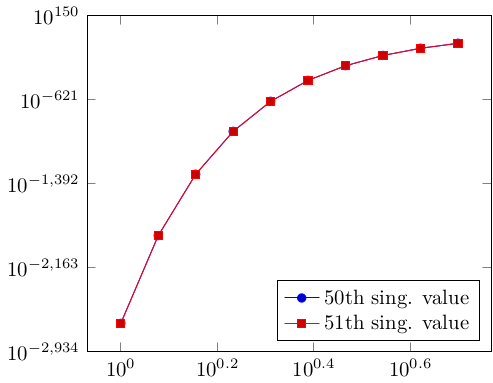

In [119]:
k = N>>1
@pgf Axis({xmode="log",ymode="log",legend_pos="south east",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value")
)

# Periodize via norm

$\phi_{\epsilon}(x) = e^{-\epsilon^2 \sin(x)^2}$

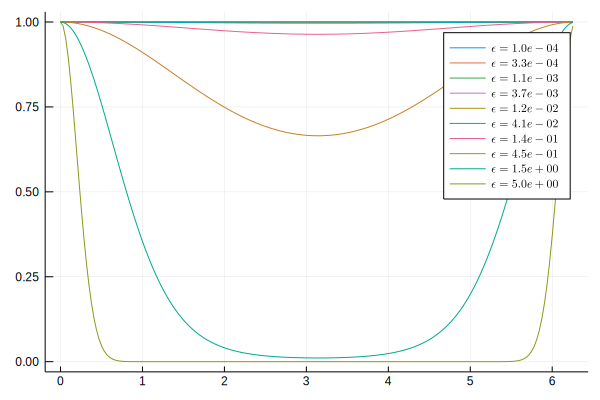

In [120]:
# setprecision(1000)
N = 51
plot();for eps in 10.0.^LinRange(log10.([1e-4,5])...,10)
    plot!(GenericEquispacedTranslates(PeriodicEquispacedGrid(N,big(0),2big(pi)), PeriodicGaussian(big(eps)))[1];
        label=latexstring("\$\\epsilon = $(@sprintf("%.1e",eps))\$"))
end;plot!()

Calculate the singular values of the collocation matrix $A$ with $A_{i,j}=\phi_\epsilon(|i-j|/N)$

In [121]:
setprecision(1024)
D = Dict()
epss = 10.0.^LinRange(log10.([1e-4,1e-1])...,10)
for eps in epss
    dict = GenericEquispacedTranslates(PeriodicEquispacedGrid(N,big(0),2big(pi)), PeriodicGaussian(big(eps)))
    A = evaluation_operator(dict,interpolation_grid(dict))
    D[eps] = svdvals(Matrix(A))
end

Plot the singular values with respect to $\epsilon$. The eigenvalue pattern is 1,2,2,2,2,2,...

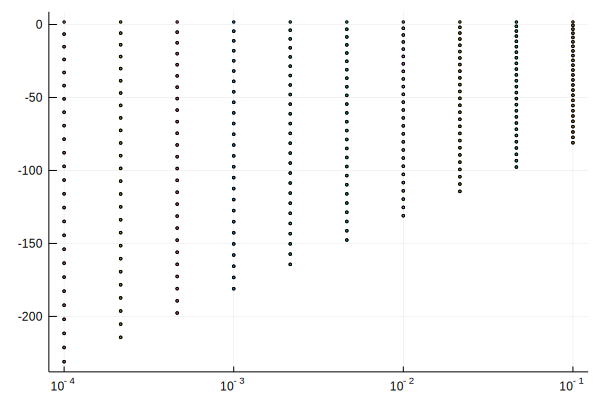

In [122]:
plot();for (eps,sing) in D 
    scatter!(eps*ones(size(sing)),log10.(sing);markersize=1)
end;plot!(;xscale=:log10,legend=false)

The first group is  $\epsilon^0$.

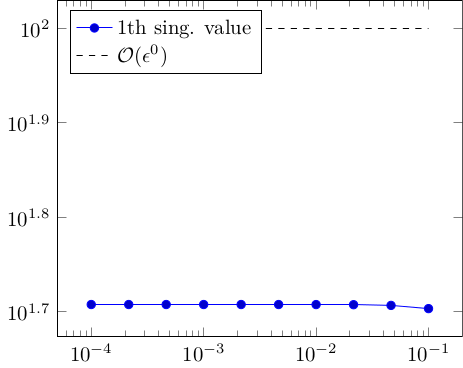

In [128]:
@pgf Axis({xmode="log",ymode="log",legend_pos="north west",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,100ones(size(epss)))), 
    LegendEntry("1th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O(\\epsilon^{0})\$"))
)

The second group is $\epsilon^2$

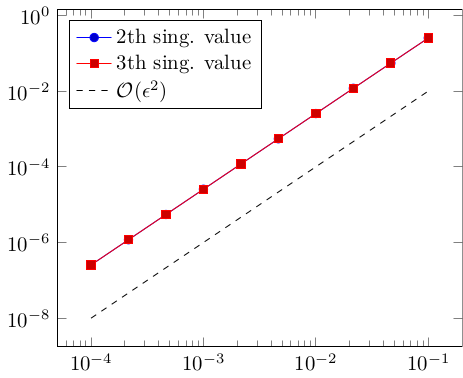

In [130]:
k = 1
@pgf Axis({xmode="log",ymode="log",legend_pos="north west",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,epss.^(2k))), 
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O(\\epsilon^{$(2k)})\$"))
)

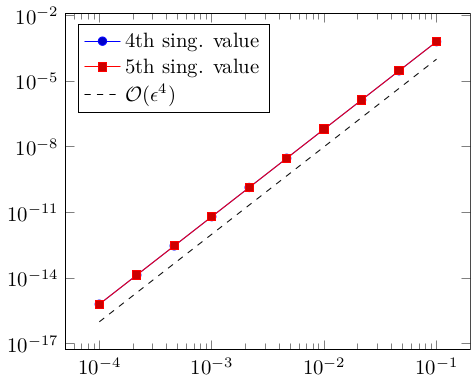

In [131]:
k = 2
@pgf Axis({xmode="log",ymode="log",legend_pos="north west",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,epss.^(2k))), 
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O(\\epsilon^{$(2k)})\$"))
)

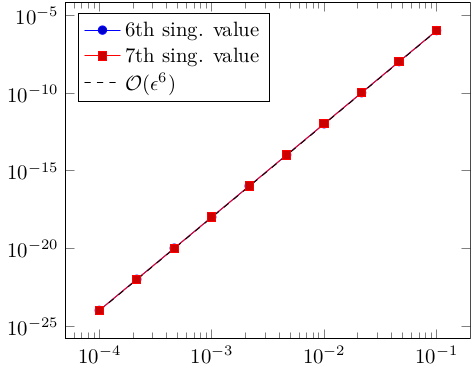

In [132]:
k = 3
@pgf Axis({xmode="log",ymode="log",legend_pos="north west",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,epss.^(2k))), 
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O(\\epsilon^{$(2k)})\$"))
)

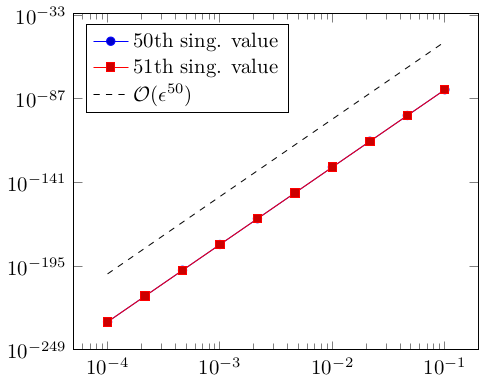

In [133]:
k = N>>1
@pgf Axis({xmode="log",ymode="log",legend_pos="north west",legend_cell_align="left"},
    Plot(Table(epss,[(D[eps][2k]) for eps in epss])),
    Plot(Table(epss,[(D[eps][2k+1]) for eps in epss])),
    Plot({mark="none",dashed},Table(epss,epss.^(2k))), 
    LegendEntry("$(2k)th sing. value"),
    LegendEntry("$(2k+1)th sing. value"),
    LegendEntry(latexstring("\$\\mathcal O(\\epsilon^{$(2k)})\$"))
)

The periodized RBF is 
$$\phi(x-y) = e^{-\epsilon^2\sin^2\left(\tfrac{x-y}{2}\right)}$$

Since 
$$\sin^{2k}\left(\tfrac{x-y}{2}\right) = \sin(kx)\cos(ky)-\cos(kx)\sin(ky)$$

and using a Taylor expansion for the exponential we get 

$$\phi(x-y) = 1 + \sum_{k=1}^\infty \epsilon^{2k} \left(\frac{(-1)^k}{k!}\right)\left[\sin(kx)\cos(ky)-\cos(kx)\sin(ky)\right]$$

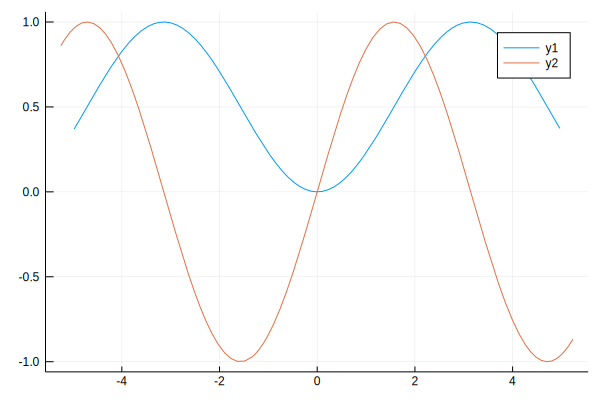

In [143]:
k = 1; y = 0.
plot(x->sin((x-y)/2)^(2k))
plot!(x->sin(k*x)cos(k*y)+cos(k*x)sin(k*y))

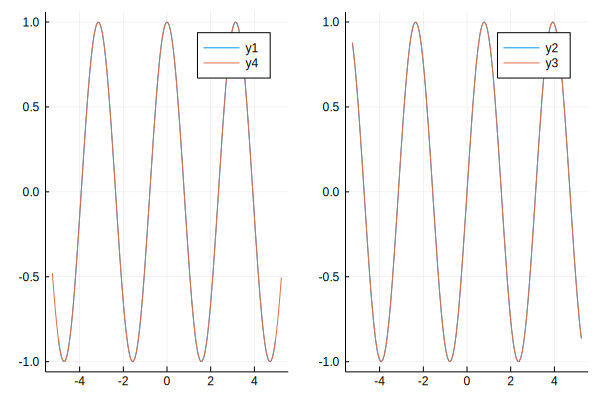

In [153]:
k = 2
plot(x->real(exp(k*1im*x));layout=2,subplot=1)
plot!(x->imag(exp(k*1im*x));subplot=2)
plot!(x->sin(k*x);subplot=2)
plot!(x->(cos(k*x));subplot=1)